In [18]:
# imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [13]:
# reading files
tech_data = pd.read_csv('tech_data_update.csv').drop(columns={'Unnamed: 0'})
finance_data = pd.read_csv('../ExtractFinances/Financial_stock_data.csv')
auto_data = pd.read_csv('../Automotive/final_auto_stock_data.csv')
healthcare_data = pd.read_csv('../Extracted Data/Healthcare_Stock_Data4.csv')

In [14]:
# combining all data
data = pd.concat([tech_data, finance_data, auto_data, healthcare_data])
print (f'there are {len(data["Ticker"].unique())} unique stocks')

there are 80 unique stocks


#### Closing prices for each sector

In [15]:
# Combining closing data per sector into one data frame
data_sectors = data['Sector'].unique()                      # 4 sectors
close_prices = []                                           # empty list to append closing prices to

# sum closing prices per sector and append to dataframe
for sector in data_sectors:
    close_prices.append(data[data['Sector']==sector].groupby('Date')['Close'].sum().rename(sector))

close_prices_sector = pd.concat(close_prices, axis = 1)     #combine into one dataframe
close_prices_sector.dropna(how='any', axis=0)               # data cleaning
close_prices_sector

,Technology,Finance,Automobiles,Healthcare
Date,,,,
2018-01-02,1655.76,1975.795009,1739.23,2750.75
2018-01-03,1672.93,1983.375045,1762.93,2784.00
2018-01-04,1691.84,2002.769992,1772.72,2780.68
2018-01-05,1707.14,2019.825018,1794.66,2814.56
2018-01-08,1709.45,2019.839986,1827.63,2799.51
...,...,...,...,...
2023-11-28,3611.02,3090.400008,3182.35,5490.08
2023-11-29,3643.20,3116.129998,3186.16,5434.82
2023-11-30,3670.31,3144.529962,3150.65,NaN


#### Moving Average for each sector
- Goal: Determine the moving average for each industry. 
    - How was each industry affected by the pandemic, and what industries are better at bouncing back from a crash?


In [11]:
mov_avg_dict = {}
ma_days = [30, 60, 150]
for sector in data_sectors:                                             # for each sector
    mov_avg = {}                                                        # create an empty dict to append to
    mov_avg[sector] = close_prices_sector[sector]                       # append closing prices to that sector
    for ma in ma_days:                                                  # for each ma period chosen
        column_name = f"MA for {ma} days"                               # name the column 
        mov_avg[column_name] = close_prices_sector[sector].rolling(ma).mean()       #calculate the rolling average for that column
    mov_avg_df = pd.DataFrame(mov_avg)                                  # convert to dataframe
    mov_avg_dict[sector] = mov_avg_df                                   # add the df to the dict
    
    # plotting, matplotlib
    # mov_avg_dict[sector].plot(rot = 45, 
    #                           ylabel = 'Close prices',
    #                           title = f'Moving average for the {sector} sector')

    # plotting, plotly
    fig = go.Figure()

    fig.add_trace(
    go.Scatter(x = mov_avg_dict[sector].index, y = mov_avg_dict[sector][sector], name = 'Closing Price'))

    fig.add_trace(
    go.Scatter(x = mov_avg_dict[sector].index, y = mov_avg_dict[sector]['MA for 30 days'], name = 'MA for 30 days'))

    fig.add_trace(
    go.Scatter(x = mov_avg_dict[sector].index, y = mov_avg_dict[sector]['MA for 60 days'], name = 'MA for 60 days'))

    fig.add_trace(
    go.Scatter(x = mov_avg_dict[sector].index, y = mov_avg_dict[sector]['MA for 150 days'], name = 'MA for 150 days'))

    fig.update_layout(
        title_text= f"Moving average for {sector}",
        xaxis_title="Date",  
        yaxis_title="Price"
    )
    # Add range slider
    fig.update_layout(
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                        label="1m",
                        step="month",
                        stepmode="backward"),
                dict(count=6,
                        label="6m",
                        step="month",
                        stepmode="backward"),
                dict(count=1,
                        label="YTD",
                        step="year",
                        stepmode="todate"),
                dict(count=1,
                        label="1y",
                        step="year",
                        stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(
            visible=True
        ),
        type="date"
    )
    )

    fig.show()
    fig.write_html(f"plots/{sector}.html")




Text(0.5, 1.0, 'Healthcare')

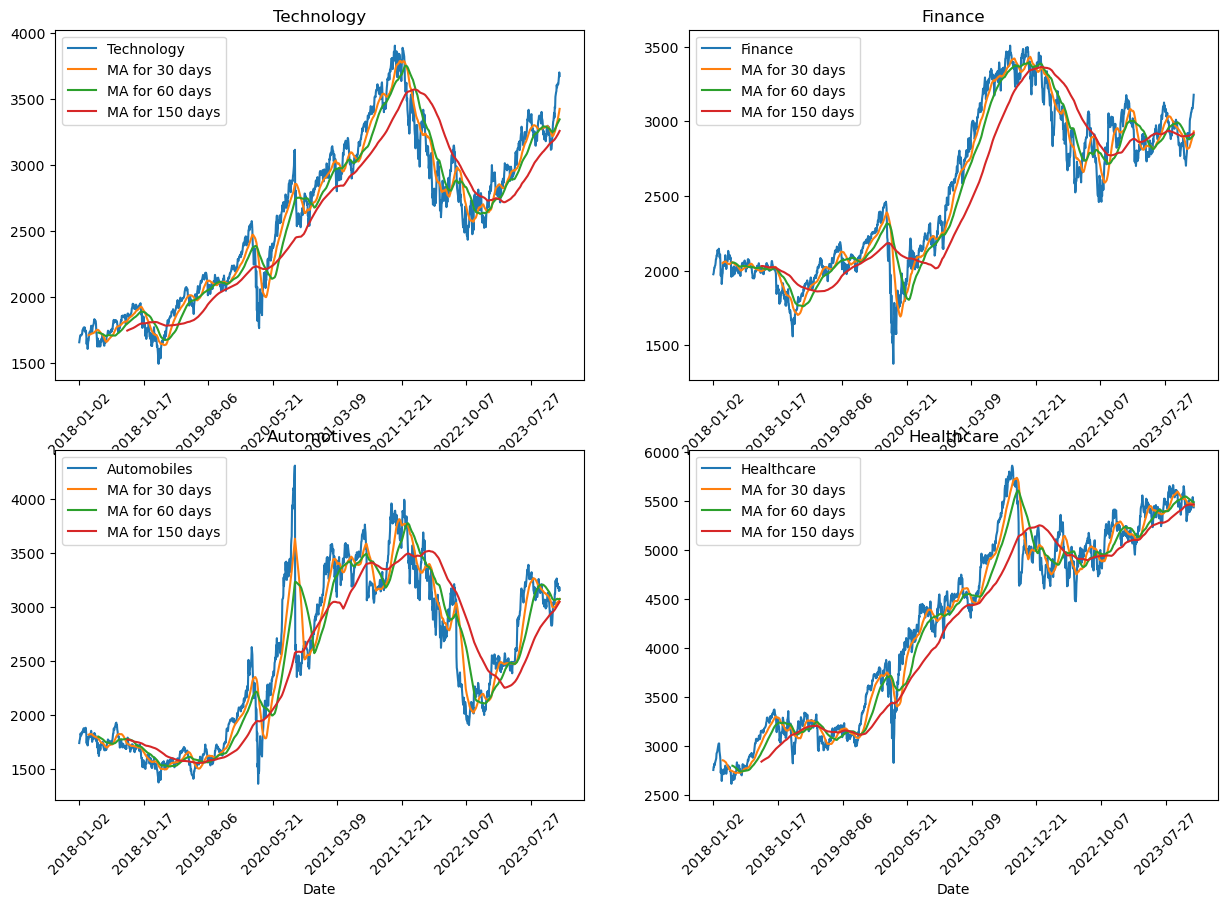

In [17]:
# plotting with matplotlib
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

mov_avg_dict['Technology'].plot(ax=axes[0,0], rot = 45)
axes[0,0].set_title('Technology')

mov_avg_dict['Finance'].plot(ax=axes[0,1], rot = 45)
axes[0,1].set_title('Finance')

mov_avg_dict['Automobiles'].plot(ax=axes[1, 0], rot = 45)
axes[1, 0].set_title('Automotives')

mov_avg_dict['Healthcare'].plot(ax=axes[1, 1], rot = 45)
axes[1, 1].set_title('Healthcare')

#### Highest volume traded by ticker per stock
- Which ticker was most traded in each year?

##### Tech Volumes by year

In [12]:
years = [2018, 2019, 2020, 2021, 2022, 2023]

,2018,2019,2020,2021,2022,2023
QCOM,3.223307e+09,3.395688e+09,2.478365e+09,2.307926e+09,2.374247e+09,1.885303e+09
TXN,1.489689e+09,1.244333e+09,1.303744e+09,1.069035e+09,1.477339e+09,1.188436e+09
ADI,7.203665e+08,6.294586e+08,7.418284e+08,8.845393e+08,9.081106e+08,7.829945e+08
MU,1.085445e+10,6.686586e+09,5.740642e+09,4.946457e+09,4.846323e+09,3.516508e+09
ARM,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.829105e+08


In 2018, 'MU' has the maximum value: 10854447338.0
In 2019, 'AAPL' has the maximum value: 7086568153.0
In 2020, 'AAPL' has the maximum value: 18552582945.0
In 2021, 'AAPL' has the maximum value: 22798348120.0
In 2022, 'AAPL' has the maximum value: 22050192133.0
In 2023, 'AAPL' has the maximum value: 13831665750.0


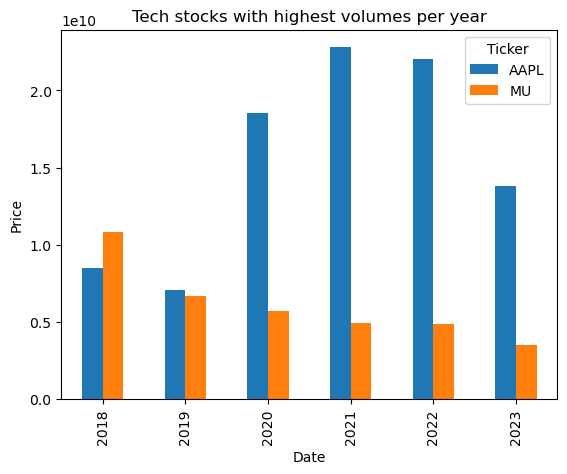

In [26]:
# calculating tech volumes per year
tech_data['Date'] = pd.to_datetime(tech_data['Date'])
tech_stocks = tech_data['Ticker'].unique()
volumes_tech = pd.DataFrame(index = tech_stocks)

for stock in tech_stocks:
    for year in years:
        # print(stock, year)
        temp_df = tech_data[tech_data['Ticker'] == stock]
        volumes_tech.loc[stock, str(year)] = temp_df[temp_df['Date'].dt.year == year]['Volume'].sum()

display(volumes_tech.head())

volumes_tech.index.name = 'Ticker'
volumes_tech.loc[['AAPL', 'MU']].transpose().plot(kind = 'bar')
plt.title('Tech stocks with highest volumes per year')
plt.xlabel('Date')
plt.ylabel('Price')

# sns.lineplot(volumes_tech.loc[['AAPL', 'MU']].transpose())
max_idx = volumes_tech.idxmax()
max_values = volumes_tech.max()

# Display the result
for year, (index, value) in zip(volumes_tech.columns, zip(max_idx, max_values)):
    print(f"In {year}, '{index}' has the maximum value: {value}")

finance volumes:


,2018,2019,2020,2021,2022,2023
WD,54260700.0,37565800.0,62259200.0,36759200.0,39475400.0,44939100.0
PFSI,50420600.0,77963000.0,208978900.0,181616400.0,136023100.0,74756900.0
LDI,0.0,0.0,0.0,145805300.0,198008700.0,83746900.0
GHI,8055403.0,11297492.0,19453061.0,15183008.0,10558602.0,8426300.0
COOP,93931032.0,190457000.0,257945600.0,199618500.0,190745900.0,138925700.0


In 2018, 'MS' has the maximum value: 2615913900.0
In 2019, 'MS' has the maximum value: 2610298700.0
In 2020, 'MS' has the maximum value: 3442832100.0
In 2021, 'MS' has the maximum value: 2455031800.0
In 2022, 'MS' has the maximum value: 2212605900.0
In 2023, 'MS' has the maximum value: 1770795400.0


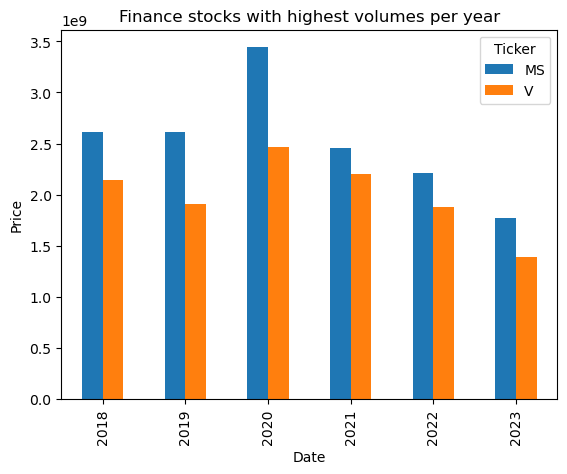

In [27]:
# calculating finance volumes per year
finance_data['Date'] = pd.to_datetime(finance_data['Date'])
finance_stocks = finance_data['Ticker'].unique()
volumes_finance = pd.DataFrame(index = finance_stocks)

for stock in finance_stocks:
    for year in years:
        # print(stock, year)
        temp_df = finance_data[finance_data['Ticker'] == stock]
        volumes_finance.loc[stock, str(year)] = temp_df[temp_df['Date'].dt.year == year]['Volume'].sum()
print(f'finance volumes:')

display(volumes_finance.head())

volumes_finance.index.name = 'Ticker'
volumes_finance.loc[['MS', 'V']].transpose().plot(kind = 'bar')
plt.title('Finance stocks with highest volumes per year')
plt.xlabel('Date')
plt.ylabel('Price')

max_idx = volumes_finance.idxmax()
max_values = volumes_finance.max()

# Display the result
for year, (index, value) in zip(volumes_finance.columns, zip(max_idx, max_values)):
    print(f"In {year}, '{index}' has the maximum value: {value}")

auto volumes:


,2018,2019,2020,2021,2022,2023
CPRT,511053510.0,361230870.0,432237914.0,248615282.0,334368470.0,619347614.0
KMX,463116782.0,399348221.0,418327154.0,288149404.0,497642399.0,470726931.0
PAG,106815905.0,94667891.0,94524261.0,79177681.0,100993602.0,77298944.0
LAD,81365326.0,60115127.0,85478498.0,92532328.0,94869262.0,64051926.0
AN,216788320.0,182633796.0,221615313.0,237972327.0,219366452.0,149428514.0


In 2018, 'AMD' has the maximum value: 21154399914.0
In 2019, 'AMD' has the maximum value: 16736086831.0
In 2020, 'F' has the maximum value: 19386854291.0
In 2021, 'F' has the maximum value: 19834224649.0
In 2022, 'AMD' has the maximum value: 22939283690.0
In 2023, 'TSLA' has the maximum value: 32270767332.0


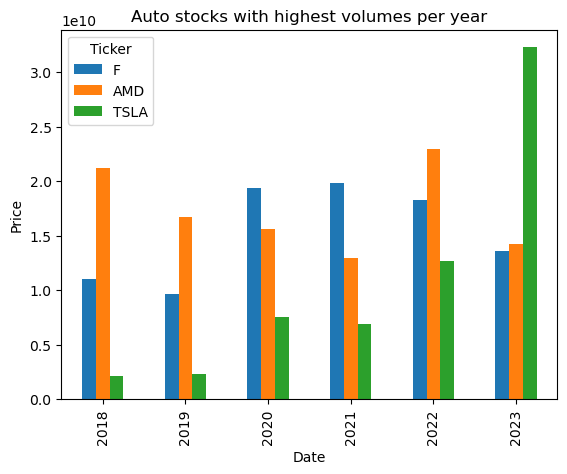

In [28]:
# calculating auto volumes per year
auto_data['Date'] = pd.to_datetime(auto_data['Date'])
auto_stocks = auto_data['Ticker'].unique()
volumes_auto = pd.DataFrame(index = auto_stocks)

for stock in auto_stocks:
    for year in years:
        # print(stock, year)
        temp_df = auto_data[auto_data['Ticker'] == stock]
        volumes_auto.loc[stock, str(year)] = temp_df[temp_df['Date'].dt.year == year]['Volume'].sum()
print(f'auto volumes:')
display(volumes_auto.head())

volumes_auto.index.name = 'Ticker'
volumes_auto.loc[['F', 'AMD', 'TSLA']].transpose().plot(kind = 'bar')
plt.title('Auto stocks with highest volumes per year')
plt.xlabel('Date')
plt.ylabel('Price')

max_idx = volumes_auto.idxmax()
max_values = volumes_auto.max()

# Display the result
for year, (index, value) in zip(volumes_auto.columns, zip(max_idx, max_values)):
    print(f"In {year}, '{index}' has the maximum value: {value}")

healthcare volumes:


,2018,2019,2020,2021,2022,2023
ISRG,201647481.0,171136660.0,182668464.0,200236188.0,527689599.0,402501607.0
BDX,294994213.0,294359126.0,461568786.0,343622099.0,309778165.0,275012600.0
ALC,0.0,246454801.0,314717951.0,203799903.0,222987909.0,205152411.0
WST,94076775.0,95187592.0,145524372.0,99113216.0,127880302.0,100784031.0
RMD,184078713.0,177291762.0,161590018.0,144982269.0,139131736.0,227231314.0


In 2018, 'PFE' has the maximum value: 5653420257.0
In 2019, 'PFE' has the maximum value: 5744360831.0
In 2020, 'PFE' has the maximum value: 8211387361.0
In 2021, 'PFE' has the maximum value: 8285808834.0
In 2022, 'PFE' has the maximum value: 6074912566.0
In 2023, 'PFE' has the maximum value: 5833544596.0


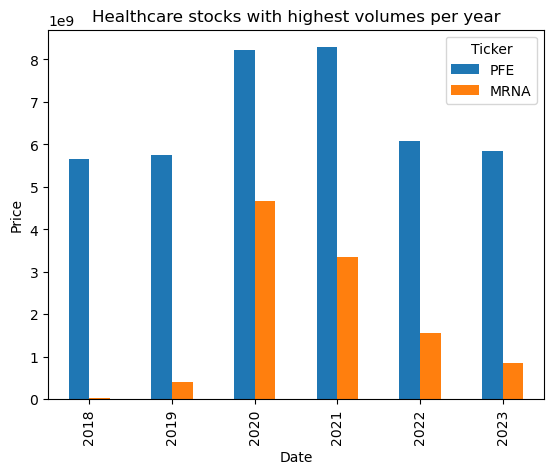

In [29]:
# calculating healthcare volumes per year
healthcare_data['Date'] = pd.to_datetime(healthcare_data['Date'])
healthcare_stocks = healthcare_data['Ticker'].unique()
volumes_healthcare = pd.DataFrame(index = healthcare_stocks)

for stock in healthcare_stocks:
    for year in years:
        # print(stock, year)
        temp_df = healthcare_data[healthcare_data['Ticker'] == stock]
        volumes_healthcare.loc[stock, str(year)] = temp_df[temp_df['Date'].dt.year == year]['Volume'].sum()
print(f'healthcare volumes:')
display(volumes_healthcare.head())

volumes_healthcare.index.name = 'Ticker'
volumes_healthcare.loc[['PFE', 'MRNA']].transpose().plot(kind = 'bar')
plt.title('Healthcare stocks with highest volumes per year')
plt.xlabel('Date')
plt.ylabel('Price')

max_idx = volumes_healthcare.idxmax()
max_values = volumes_healthcare.max()

# Display the result
for year, (index, value) in zip(volumes_healthcare.columns, zip(max_idx, max_values)):
    print(f"In {year}, '{index}' has the maximum value: {value}")